In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for visualization of data
import seaborn as sns
from termcolor import colored as cl
from sklearn.model_selection import train_test_split # to split the data into testing and training data
from sklearn.preprocessing import MinMaxScaler # scaler for the data

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from tensorflow.keras.models import Sequential # Neural Networks
from tensorflow.keras.layers  import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

In [2]:
# reading the dataset
df = pd.read_excel('/content/DS - Assignment Part 1 data set.xlsx')

In [3]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Transaction date,2012.916667,2012.916667,2013.583333,2013.50000,2012.833333,2012.666667,2012.666667,2013.416667,2013.50000,2013.416667,2013.083333,2013.333333,2012.916667,2012.666667,2013.50000,2013.583333,2013.25000,2012.75000,2013.416667,2012.666667
House Age,32.000000,19.500000,13.300000,13.30000,5.000000,7.100000,34.500000,20.300000,31.70000,17.900000,34.800000,6.300000,13.000000,20.400000,13.20000,35.700000,0.00000,17.70000,16.900000,1.500000
Distance from nearest Metro station (km),84.878820,306.594700,561.984500,561.98450,390.568400,2175.030000,623.473100,287.602500,5512.03800,1783.180000,405.213400,90.456060,492.231300,2469.645000,1164.83800,579.208300,292.99780,350.85150,368.136300,23.382840
Number of convenience stores,10.000000,9.000000,5.000000,5.00000,5.000000,3.000000,7.000000,6.000000,1.00000,3.000000,1.000000,9.000000,5.000000,4.000000,4.00000,2.000000,6.00000,1.00000,8.000000,7.000000
latitude,24.982980,24.980340,24.987460,24.98746,24.979370,24.963050,24.979330,24.980420,24.95095,24.967310,24.973490,24.974330,24.965150,24.961080,24.99156,24.982400,24.97744,24.97544,24.967500,24.967720
longitude,121.540240,121.539510,121.543910,121.54391,121.542450,121.512540,121.536420,121.542280,121.48458,121.514860,121.533720,121.543100,121.537370,121.510460,121.53406,121.546190,121.54458,121.53119,121.544510,121.541020
Number of bedrooms,1.000000,2.000000,3.000000,2.00000,1.000000,3.000000,3.000000,3.000000,1.00000,2.000000,1.000000,3.000000,3.000000,3.000000,1.00000,2.000000,3.00000,1.00000,3.000000,2.000000
House size (sqft),575.000000,1240.000000,1060.000000,875.00000,491.000000,828.000000,1115.000000,1316.000000,588.00000,1075.000000,466.000000,1423.000000,1172.000000,928.000000,512.00000,1322.000000,1441.00000,568.00000,1291.000000,1223.000000
House price of unit area,37.900000,42.200000,47.300000,54.80000,43.100000,32.100000,40.300000,46.700000,18.80000,22.100000,41.400000,58.100000,39.300000,23.800000,34.30000,50.500000,70.10000,37.40000,42.300000,47.700000


In [4]:
df.shape

(414, 9)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Transaction date,414.0,2013.148953,0.281995,2012.666667,2012.916667,2013.166667,2013.416667,2013.583333
House Age,414.0,17.712560,11.392485,0.000000,9.025000,16.100000,28.150000,43.800000
Distance from nearest Metro station (km),414.0,1083.885689,1262.109595,23.382840,289.324800,492.231300,1454.279000,6488.021000
Number of convenience stores,414.0,4.094203,2.945562,0.000000,1.000000,4.000000,6.000000,10.000000
latitude,414.0,24.969030,0.012410,24.932070,24.963000,24.971100,24.977455,25.014590
longitude,414.0,121.533361,0.015347,121.473530,121.528085,121.538630,121.543305,121.566270
Number of bedrooms,414.0,1.987923,0.818875,1.000000,1.000000,2.000000,3.000000,3.000000
House size (sqft),414.0,931.475845,348.910269,402.000000,548.000000,975.000000,1234.750000,1500.000000
House price of unit area,414.0,37.980193,13.606488,7.600000,27.700000,38.450000,46.600000,117.500000


In [6]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [7]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

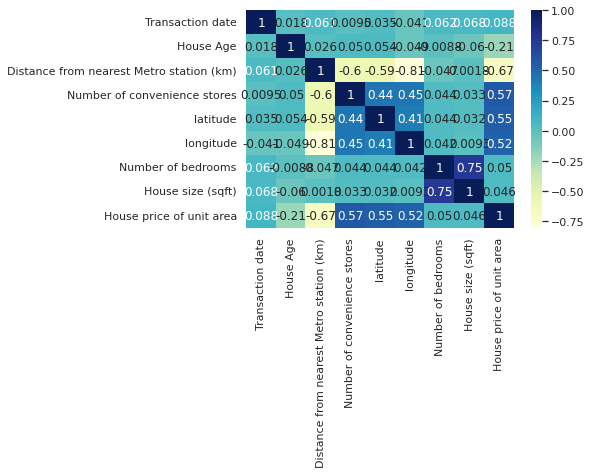

In [8]:
sns.set_theme(style="darkgrid")

sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

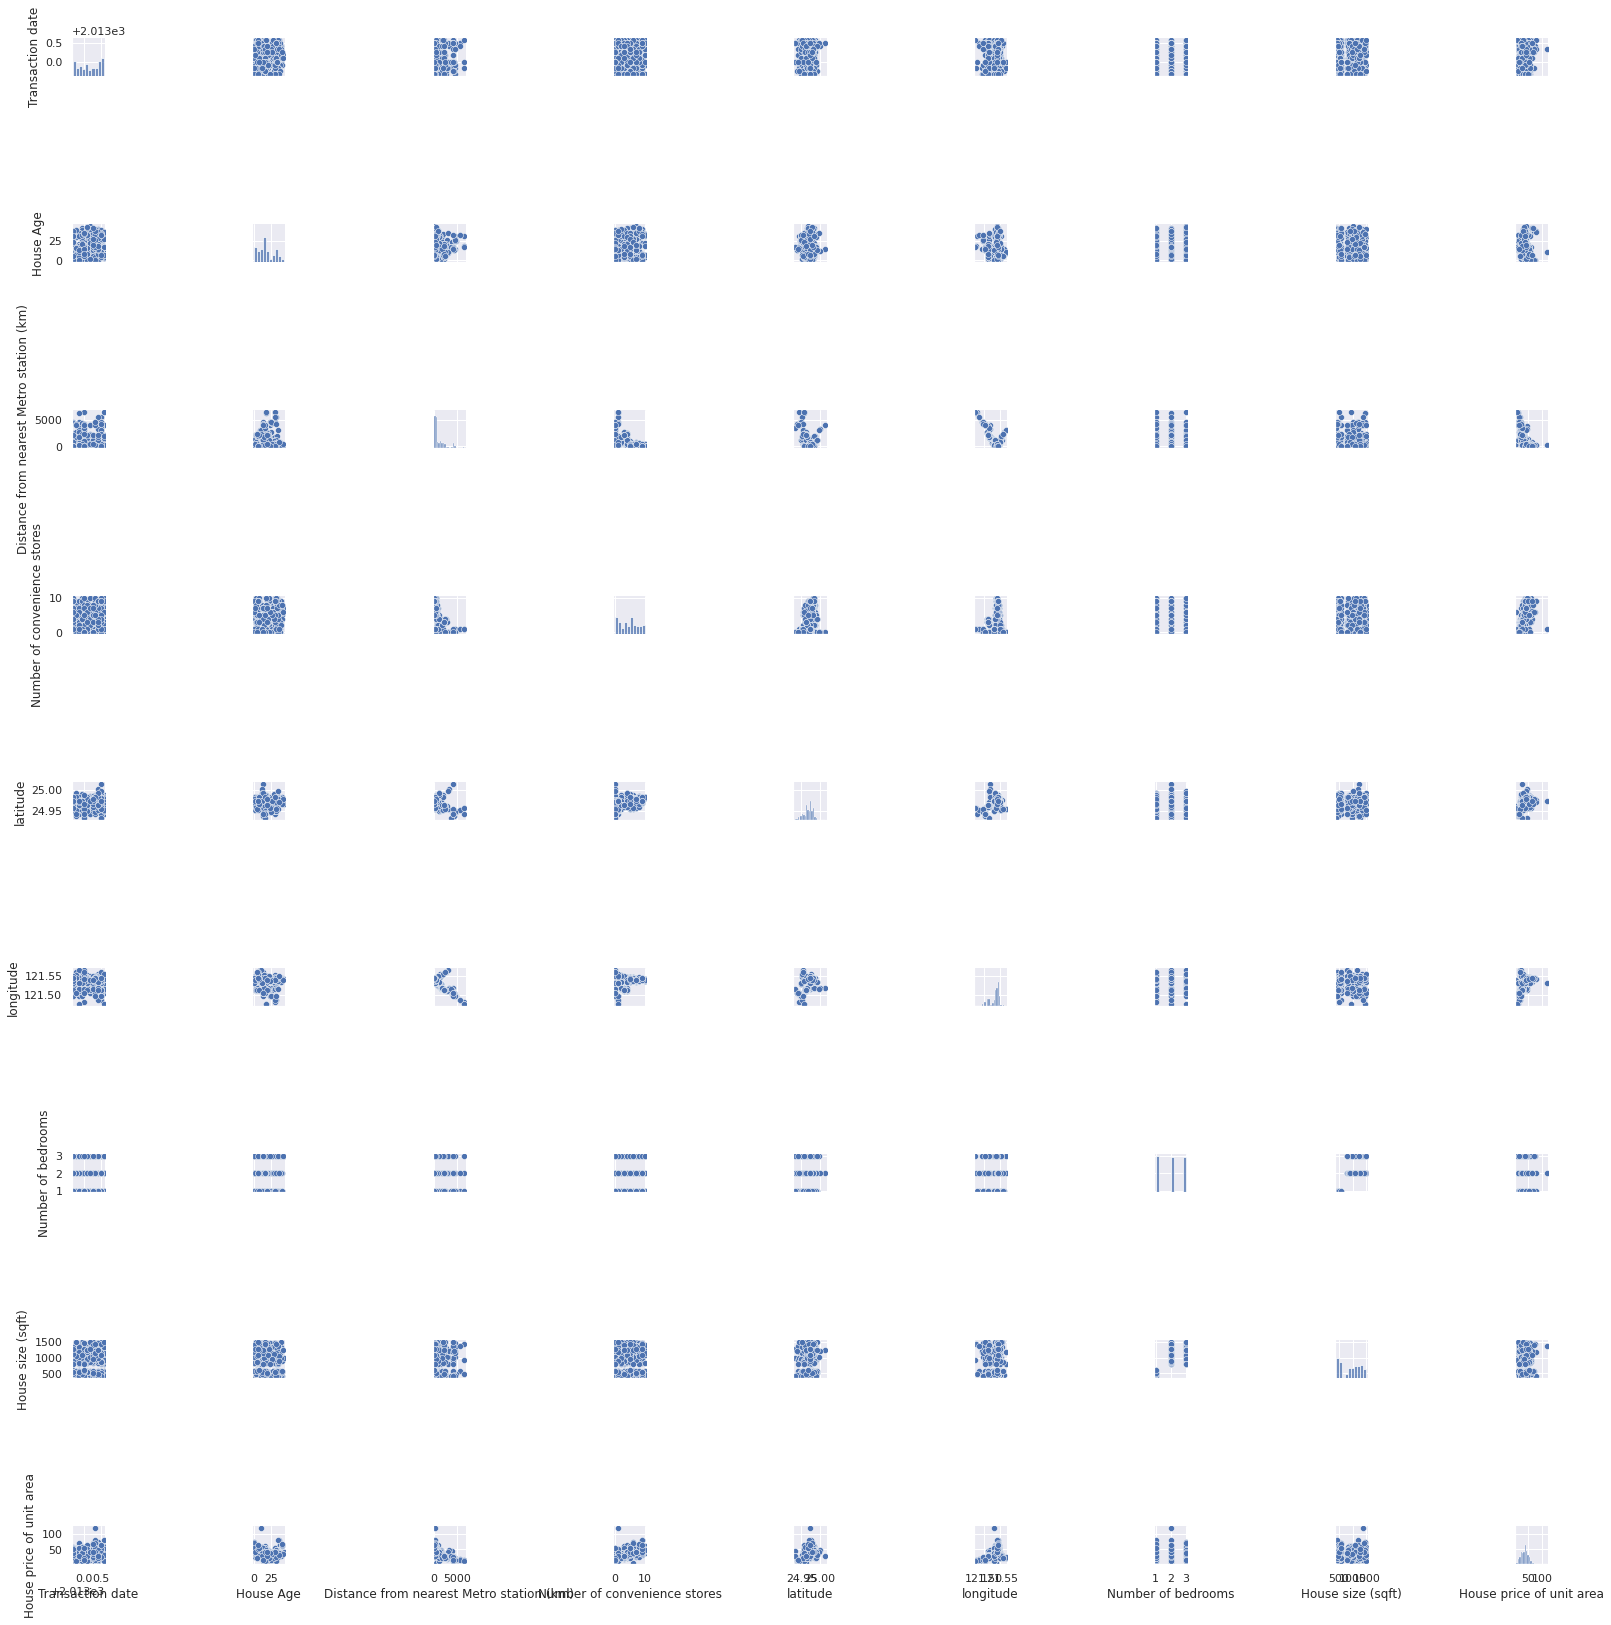

In [9]:
sns.pairplot(df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


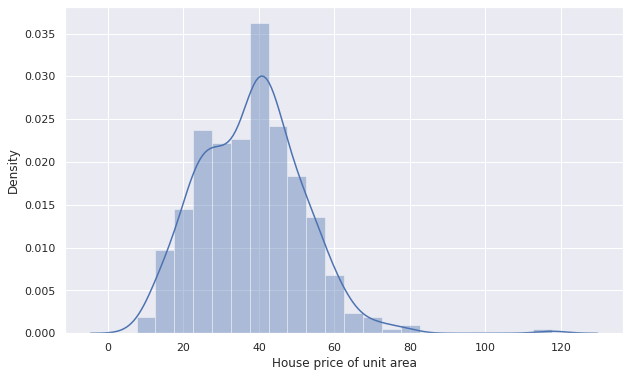

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(df['House price of unit area'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


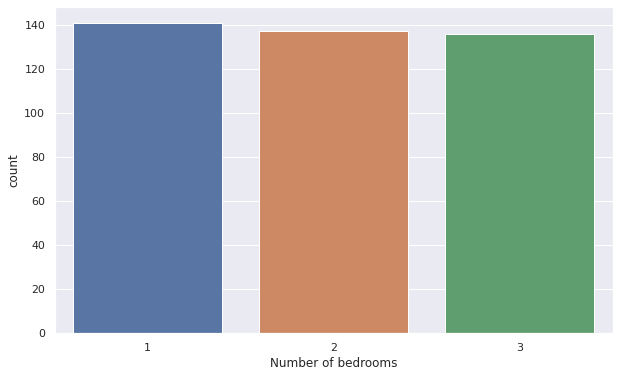

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(df['Number of bedrooms'])

In [12]:
df.corr()['House price of unit area'].sort_values()

Distance from nearest Metro station (km)   -0.673613
House Age                                  -0.210567
House size (sqft)                           0.046489
Number of bedrooms                          0.050265
Transaction date                            0.087529
longitude                                   0.523287
latitude                                    0.546307
Number of convenience stores                0.571005
House price of unit area                    1.000000
Name: House price of unit area, dtype: float64

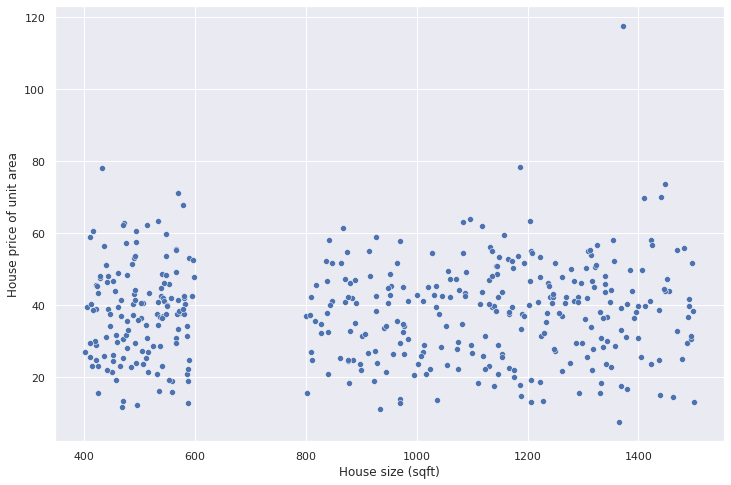

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='House size (sqft)', y='House price of unit area', data=df)

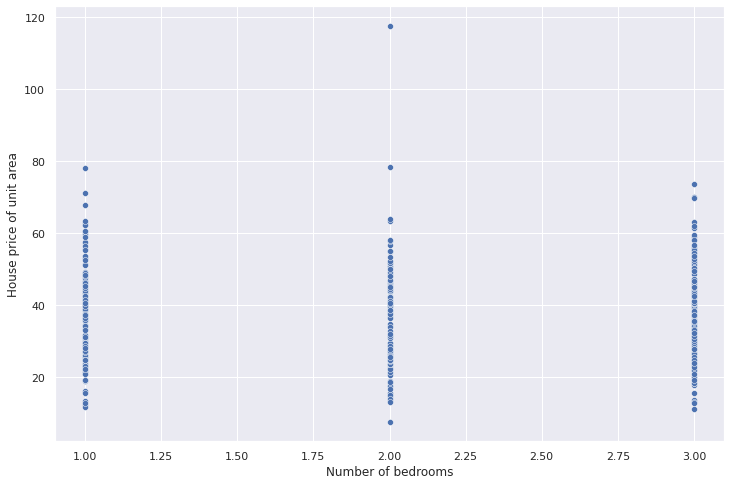

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Number of bedrooms', y='House price of unit area', data=df)

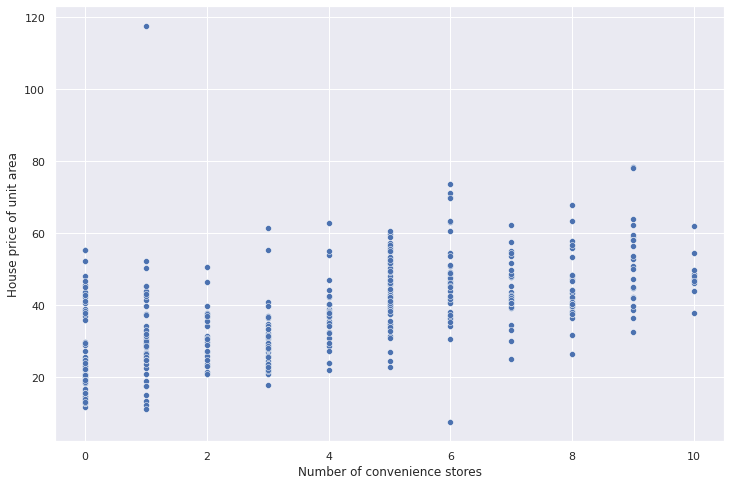

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Number of convenience stores', y='House price of unit area', data=df)

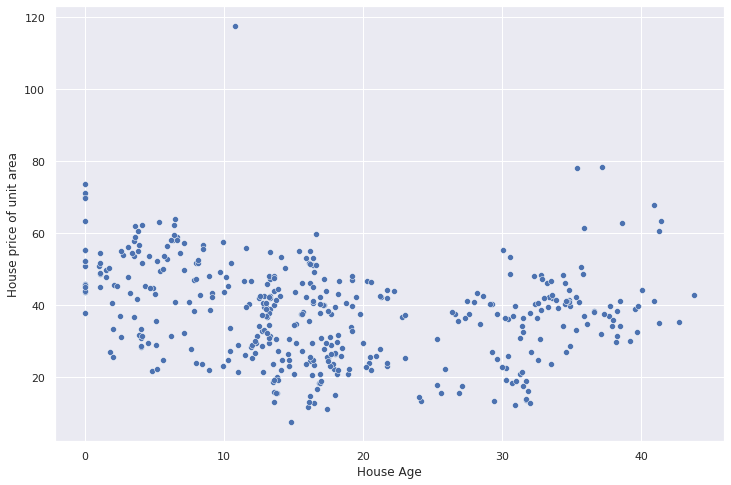

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='House Age', y='House price of unit area', data=df)

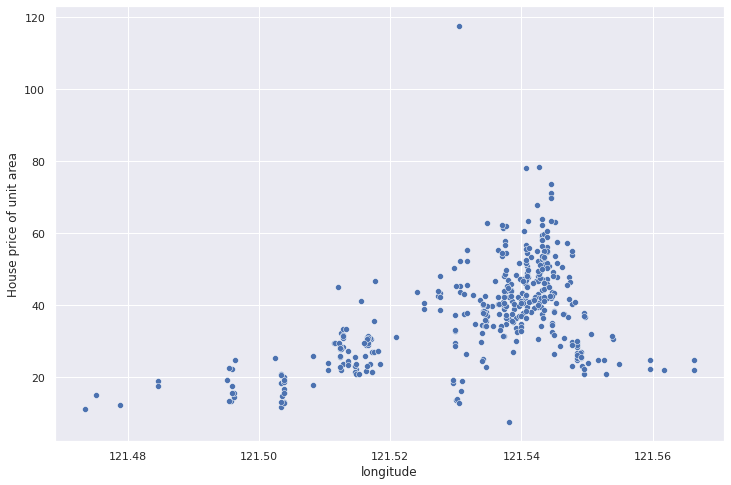

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='longitude', y='House price of unit area', data=df)

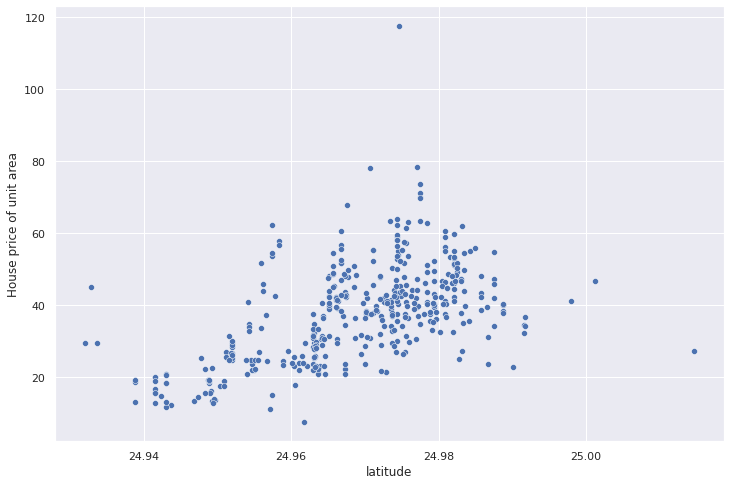

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='latitude', y='House price of unit area', data=df)

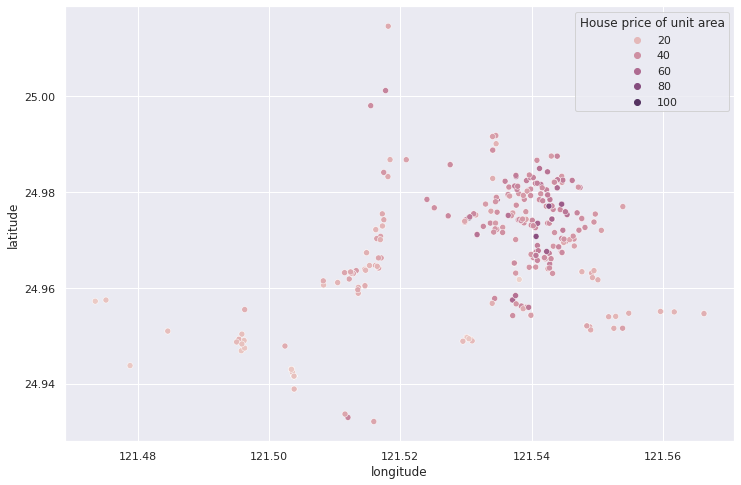

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='House price of unit area')

In [20]:
df.sort_values('House price of unit area', ascending=False).head(20)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
270,2013.333333,10.8,252.58220,1,24.97460,121.53046,2,1373,117.5
220,2013.333333,37.2,186.51010,9,24.97703,121.54265,2,1187,78.3
312,2013.583333,35.4,318.52920,9,24.97071,121.54069,1,433,78.0
166,2013.416667,0.0,292.99780,6,24.97744,121.54458,3,1448,73.6
105,2012.833333,0.0,292.99780,6,24.97744,121.54458,1,570,71.0
16,2013.250000,0.0,292.99780,6,24.97744,121.54458,3,1441,70.1
379,2013.333333,0.0,292.99780,6,24.97744,121.54458,3,1410,69.7
389,2013.250000,40.9,122.36190,8,24.96756,121.54230,1,579,67.7
413,2013.500000,6.5,90.45606,9,24.97433,121.54310,2,1097,63.9
361,2013.083333,41.4,281.20500,8,24.97345,121.54093,1,533,63.3


In [21]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [22]:
df['Transaction date']

0      2012.916667
1      2012.916667
2      2013.583333
3      2013.500000
4      2012.833333
          ...     
409    2013.000000
410    2012.666667
411    2013.250000
412    2013.000000
413    2013.500000
Name: Transaction date, Length: 414, dtype: float64

In [23]:
df['Transaction date'] = df['Transaction date'].apply(lambda x : str(x)[:4])

In [24]:
# There is no need to drop any coloumn.

In [25]:
# Data Preprocessing and Preparation
x = df.drop('House price of unit area', axis=1).values
y = df['House price of unit area'].values

In [26]:
# splitting Train and Test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=102)

In [27]:
scaler = MinMaxScaler()

In [28]:
# standardization scaler - fit and transform on train
x_train = scaler.fit_transform(x_train)

In [29]:
# Fit only on test
x_test = scaler.transform(x_test)

In [30]:
# Getting predictions of LinearRegression
ols = LinearRegression()
ols.fit(x_train, y_train)
ols_yhat = ols.predict(x_test)

In [31]:
# Getting predictions of Ridge
ridge = Ridge(alpha = 0.5)
ridge.fit(x_train, y_train)
ridge_yhat = ridge.predict(x_test)

In [32]:
# Getting predictions of lasso
lasso = Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)
lasso_yhat = lasso.predict(x_test)

In [33]:
# Getting predictions of BayesianRidge
bayesian = BayesianRidge()
bayesian.fit(x_train, y_train)
bayesian_yhat = bayesian.predict(x_test)

In [34]:
# Getting predictions of ElasticNet
en = ElasticNet(alpha = 0.01)
en.fit(x_train, y_train)
en_yhat = en.predict(x_test)

In [35]:
# Getting predictions of Neural networks
NN = Sequential()

NN.add(Dense(19,activation='relu'))
NN.add(Dense(19,activation='relu'))
NN.add(Dense(19,activation='relu'))
NN.add(Dense(1))

NN.compile(optimizer='adam',loss='mse')

In [36]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 10)

In [37]:
NN.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=800, callbacks=[early_stop])

Epoch 1/800
3/3 [==============================] - 1s 69ms/step - loss: 1607.1484 - val_loss: 1642.2513
Epoch 2/800
3/3 [==============================] - 0s 11ms/step - loss: 1601.6803 - val_loss: 1636.4386
Epoch 3/800
3/3 [==============================] - 0s 11ms/step - loss: 1595.7966 - val_loss: 1630.1207
Epoch 4/800
3/3 [==============================] - 0s 11ms/step - loss: 1589.2269 - val_loss: 1623.2379
Epoch 5/800
3/3 [==============================] - 0s 15ms/step - loss: 1582.0569 - val_loss: 1615.6823
Epoch 6/800
3/3 [==============================] - 0s 12ms/step - loss: 1574.0277 - val_loss: 1607.4653
Epoch 7/800
3/3 [==============================] - 0s 13ms/step - loss: 1565.2628 - val_loss: 1598.5294
Epoch 8/800
3/3 [==============================] - 0s 22ms/step - loss: 1555.8613 - val_loss: 1588.7489
Epoch 9/800
3/3 [==============================] - 0s 13ms/step - loss: 1545.6722 - val_loss: 1578.0364
Epoch 10/800
3/3 [==============================] - 0s 13ms/step

In [38]:
losses = pd.DataFrame(NN.history.history)

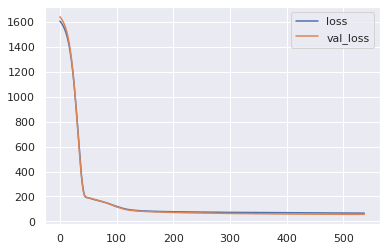

In [39]:
losses.plot()

In [40]:
NN_yhat = NN.predict(x_test)

3/3 [==============================] - 0s 2ms/step


In [41]:
print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print(cl('Explained Variance Score of Neural Netwrok is {}'.format(evs(y_test, NN_yhat)), attrs = ['bold']))

EXPLAINED VARIANCE SCORE:
Explained Variance Score of OLS model is 0.6430277206758825
Explained Variance Score of Ridge model is 0.6405629523875558
Explained Variance Score of Lasso model is 0.6444986306662535
Explained Variance Score of Bayesian model is 0.640612364923246
Explained Variance Score of ElasticNet is 0.6358712559801619
Explained Variance Score of Neural Netwrok is 0.7194435132163912


In [42]:
print(cl('R-SQUARED:', attrs = ['bold']))
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print(cl('R-Squared of Neural Netwrok is {}'.format(r2(y_test, NN_yhat)), attrs = ['bold']))

R-SQUARED:
R-Squared of OLS model is 0.6350285068259496
R-Squared of Ridge model is 0.632859205889034
R-Squared of Lasso model is 0.6365962765771775
R-Squared of Bayesian model is 0.6329025305346585
R-Squared of ElasticNet is 0.6287859159263693
R-Squared of Neural Netwrok is 0.7183959192134135


In [43]:
# As you can see Neural Networks have the highest accuracy